In [1]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
import os
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline
import time

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 21s 0us/step


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [36]:
total_time=[] 

In [60]:
Category = "Men's_Shirts"
vgg16_feature_list = []
image_names=[]

start = time.time()

path = '/Users/Student/Downloads/visual_search/models/Data/Semi_train/' + Category
for img_path in os.listdir(path):
    if('.DS_Store' not in os.path.join(path,img_path)):
        image_names.append(img_path)
        img = image.load_img(os.path.join(path,img_path), target_size=(224, 224))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)
        vgg16_feature = model.predict(img_data)
        vgg16_feature_np = np.array(vgg16_feature)
        vgg16_feature_list.append(vgg16_feature_np.flatten())

vgg16_feature_list_np = np.array(vgg16_feature_list)
end = time.time()
print("Total Time", end - start)

Total Time 669.8724539279938


In [61]:
total_time.append( end - start) 

In [62]:
total_time

[104.00228977203369,
 1742.0854399204254,
 858.2669169902802,
 1815.8595170974731,
 669.8724539279938]

In [63]:
vgg16_feature_list_np.shape

(1057, 25088)

In [64]:
vgg16_feature_list_np

array([[ 0.       ,  0.       , 15.918209 , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  8.460708 ,
         0.       ],
       ...,
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  3.3051372,
         0.       ],
       [ 0.       ,  0.       , 11.368393 , ...,  0.       ,  6.3339744,
         0.       ]], dtype=float32)

In [65]:
import pickle

pickled_db_path = "features_VGG16/Men's_Shirts.pck"

with open(pickled_db_path, 'wb') as fp:
        pickle.dump(vgg16_feature_list_np, fp)
        print("dumped")
fp.close()

dumped


In [66]:
with open(pickled_db_path, 'rb') as fp:
        #vgg_loaded = pickle.load(fp)
        vgg_loaded = pickle.load(fp)
        print("loaded")
fp.close()

loaded


In [50]:
vgg_loaded.shape

(1209, 25088)

In [11]:
# query_image_path = "C:/Users/SAI SUPRAJA M/Desktop/visual_search/Data/Semi_train/Chiffon/40632_shop_01.jpg"
query_image_path= "11046_shop_01.jpg"
imgq = image.load_img(query_image_path, target_size=(224, 224))
img_dataq = image.img_to_array(imgq)
img_dataq = np.expand_dims(img_dataq, axis=0)
img_dataq = preprocess_input(img_dataq)
vgg16_feature_query = model.predict(img_dataq)
vgg16_feature_np_query = np.array(vgg16_feature_query)
vgg16_feature_np_query = vgg16_feature_np_query.flatten()

In [12]:
vgg16_feature_np_query.shape

(25088,)

In [13]:
from scipy.spatial import distance

similarity = []
count = 0

for i in vgg_loaded:
    count = count+1
    d = distance.cosine(i,vgg16_feature_np_query)
    sim = 1-d
    similarity.append((sim,image_names[count-1]))


In [14]:
similarity

[(0.11643772572278976, '11038_shop_01.jpg'),
 (0.12841390073299408, '11039_comsumer_04.jpg'),
 (0.11281570792198181, '11040_comsumer_05.jpg'),
 (0.20608770847320557, '11041_comsumer_01.jpg'),
 (0.16654759645462036, '11042_comsumer_02.jpg'),
 (0.06874115765094757, '11043_comsumer_03.jpg'),
 (0.11245595663785934, '11044_comsumer_08.jpg'),
 (0.22532878816127777, '11045_comsumer_09.jpg'),
 (1.0, '11046_shop_01.jpg'),
 (0.17396600544452667, '11047_comsumer_07.jpg'),
 (0.1406175196170807, '11048_comsumer_13.jpg'),
 (0.16241759061813354, '11049_comsumer_12.jpg'),
 (0.23794613778591156, '11050_comsumer_06.jpg'),
 (0.23369838297367096, '11051_comsumer_10.jpg'),
 (0.21688558161258698, '11052_comsumer_04.jpg'),
 (0.1806550770998001, '11053_comsumer_05.jpg'),
 (0.23813612759113312, '11054_comsumer_11.jpg'),
 (0.22936713695526123, '11055_comsumer_15.jpg'),
 (0.2070244401693344, '11056_comsumer_01.jpg'),
 (0.1158212348818779, '11057_comsumer_14.jpg'),
 (0.1488025188446045, '11058_comsumer_02.jpg'),


In [15]:
def show_img(path):
    img =imread(path, mode="RGB")
    plt.imshow(img)
    plt.show()

Query image ==========================================


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


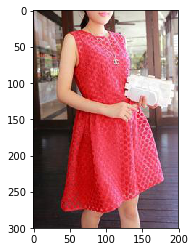

Result images ========================================
similarity 1.0


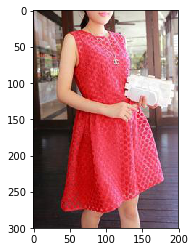

similarity 0.3477309048175812


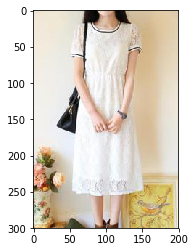

similarity 0.33291497826576233


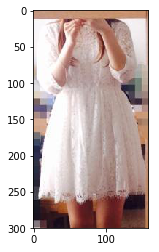

similarity 0.3121335506439209


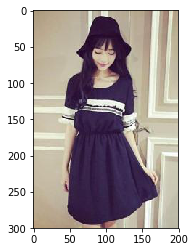

similarity 0.2973427474498749


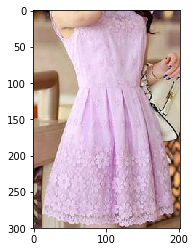

similarity 0.28881317377090454


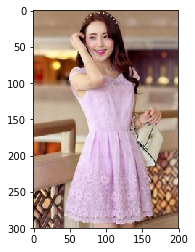

In [19]:
# After sorting images through similarity
des_similarity = sorted(similarity,reverse=True)
des_similarity =des_similarity[:6]
Category = "Lace_Dress"
path = '/Users/Student/Downloads/visual_search/models/Data/Semi_train/' + Category


print ('Query image ==========================================')
show_img(query_image_path)


print ('Result images ========================================')
for i in range(0,len(des_similarity)):
    print("similarity",des_similarity[i][0])
    show_img(path+ "/"+des_similarity[i][1])

In [67]:
total_model_time = 0.0
for i in range(0, len(total_time)):
    total_model_time = total_model_time + total_time[i]

print("total_model_time", total_model_time)

total_model_time 5190.086617708206
